<a href="https://colab.research.google.com/github/davidmuna/Hass-Consulting-Company/blob/master/Core_Supervised_learning_week_7_project_David_Muna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Regression -Core Week 7

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist, I work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, I'll create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success


To conduct the following and improve the performance of the models while using the metrics for performance as score, MSE and  RMSE:

*   Multiple Linear Regression
*   Quantile Regression
*   Lasso Regression
*   Ridge Regression
*   Elastic Net Regression



### d) Recording the Experimental Design

Perform EDA
Check of multicollinearity
Modelling and Cross-validation
Computing MSE, RMSE and Accuracy Scores
Create residual plots for MLR model, and assess the heteroscedasticity using Bartlett’s test

### e) Data Relevance

The data will be considered relevant once the metrics of succes have been computed and alternative regression models used to challenge our solution.

## 2. Reading the Data

In [83]:
# loading and previewing the Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Checking the Data

In [84]:
#Shape of datasets
print(house.shape)

(21613, 20)


In [85]:
# Previewing the top of our dataset
house.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [86]:
#Previewing the bottom
house.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [87]:
# Checking column datatypes
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [88]:
#Checking missing values
print(house.isnull().sum())

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [89]:
#Dropping Missing Values
house.dropna(axis = 0, inplace= True)

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [90]:
# Checking for Anomalies

#The bathroom column is in float/decimal points, we'll covert to int and truncate
house['bathrooms'] = house['bathrooms'].astype(int)
house['floors'] = house['floors'].astype(int)

#Looking at unique values in some columns
print("bathrooms :", house['bathrooms'].unique())
print("bedrooms :", house['bedrooms'].unique())  #Looks like it mights have an outlier of 33 bedrooms
print("floors :", house['floors'].unique()) 
print("waterfront :", house['waterfront'].unique()) 
print("view :", house['view'].unique()) 
print("condition :", house['condition'].unique()) 
print("grade :", house['grade'].unique()) 	
print("year renovated :", house['yr_renovated'].unique())

bathrooms : [1 2 3 4 0 5 6 8 7]
bedrooms : [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
floors : [1 2 3]
waterfront : [0 1]
view : [0 3 4 2 1]
condition : [3 5 4 1 2]
grade : [ 7  6  8 11  9  5 10 12  4  3 13  1]
year renovated : [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]


In [91]:
#Checking for the house bedroom sizes against the area of living room
bedroom_and_area = house.groupby(['bedrooms'])['sqft_living'].mean()
bedroom_and_area

#The average living room size of a 11 bedroom house is 3000, which means 33 bedrooms is an outlier

bedrooms
0     1707.846154
1      884.613065
2     1239.752899
3     1805.837235
4     2554.649666
5     3047.545284
6     3284.341912
7     3974.210526
8     3800.000000
9     3775.000000
10    3706.666667
11    3000.000000
33    1620.000000
Name: sqft_living, dtype: float64

In [92]:
# #Dealing with bedrooms Outlier

#Replacing 33 bedrooms with 3 since it falls within the average living room area of 1805
house["bedrooms"].replace({33: 3}, inplace=True)
house["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

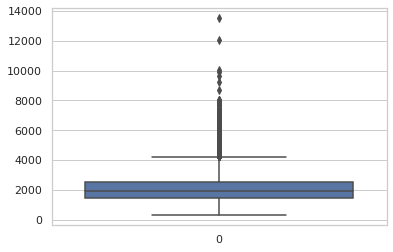

In [93]:
#Checking outliers in sqft areas
sns.boxplot(data=house['sqft_living']);           

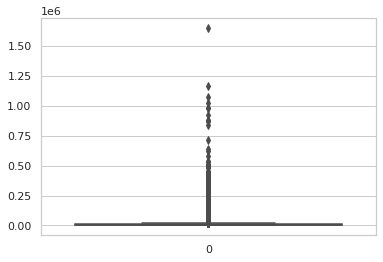

In [94]:
sns.boxplot(data=house['sqft_lot']);  

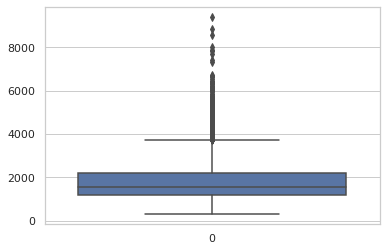

In [95]:
sns.boxplot(data=house['sqft_above']); 	

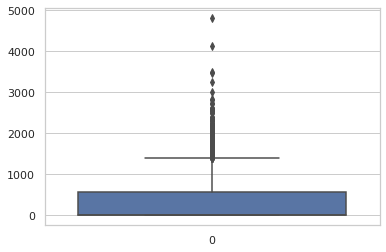

In [96]:
sns.boxplot(data=house['sqft_basement']); 

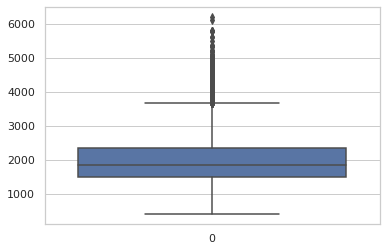

In [97]:
sns.boxplot(data=house['sqft_living15']); 

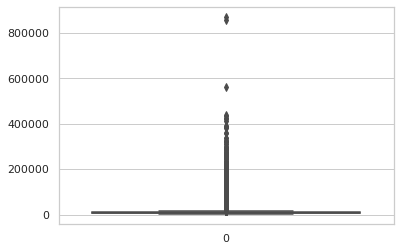

In [98]:
sns.boxplot(data=house['sqft_lot15']); 

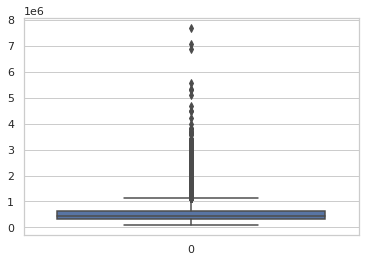

In [99]:
#Checking Outliers in Price
sns.boxplot(data=house['price']); 

The outliers will be retained since they are quite many, meaning they are meaningful

In [100]:
#Checking duplicates and dropping them
print("Duplicates :", house.duplicated().sum())
house.drop_duplicates(keep='first',inplace = True)
print("Duplicates :", house.duplicated().sum())

Duplicates : 3
Duplicates : 0


## 6. Exploratory Data Analysis

#### Univariate, Bivariate and Multivariate Summaries

In [101]:
#Summary Statistics
house[['price','bathrooms','bedrooms','floors','view','condition','grade']].describe()

,price,bathrooms,bedrooms,floors,view,condition,grade
count,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,1.749745,3.369459,1.446136,0.234197,3.409440,7.656779
std,3.673876e+05,0.734902,0.908010,0.551893,0.766136,0.650764,1.175500
min,7.500000e+04,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.216125e+05,1.000000,3.000000,1.000000,0.000000,3.000000,7.000000
50%,4.500000e+05,2.000000,3.000000,1.000000,0.000000,3.000000,7.000000
75%,6.450000e+05,2.000000,4.000000,2.000000,0.000000,4.000000,8.000000
max,7.700000e+06,8.000000,11.000000,3.000000,4.000000,5.000000,13.000000


In [102]:
house[['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']].describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,2079.881212,1.510829e+04,1788.347894,291.533318,1971.003609,84.322351,1986.518695,12769.031976
std,918.500299,4.142323e+04,828.138723,442.596699,29.372639,401.499264,685.425781,27305.972464
min,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,1425.500000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,1910.000000,7.619000e+03,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,2550.000000,1.068875e+04,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


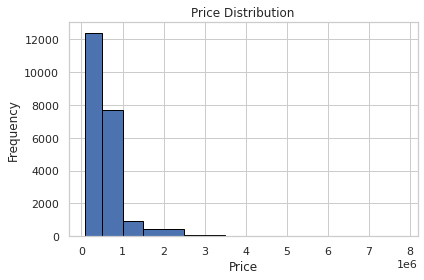

In [103]:
#Histogram of Price Distributions

bins = [75000,500000,1000000,1500000,2500000,3500000,4500000,5500000,6500000,7800000]
plt.hist(house['price'],bins =bins , edgecolor ='black' )
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#WE IDENTIFY THAT THE PRICE IS NOT NORMALLY DISTRIBUTED

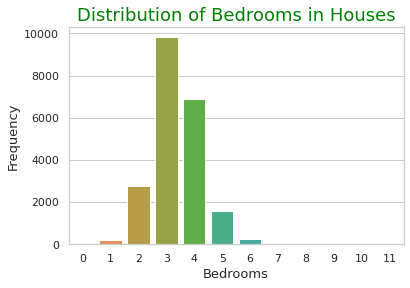

In [104]:
sns.set(style="whitegrid")
sns.countplot(house['bedrooms'],data = house)
plt.xlabel("Bedrooms",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
plt.title("Distribution of Bedrooms in Houses",fontsize=18,color="green")
plt.show()

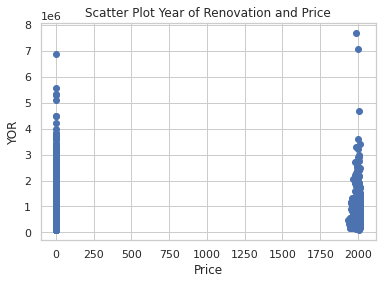

In [105]:
#Scatter plot of Year of Renovation and Price
#The year of renovation does not seem to affect the price as seen below
plt.scatter(house['yr_renovated'],house['price'] )
plt.title('Scatter Plot Year of Renovation and Price')
plt.xlabel('Price')
plt.ylabel('YOR')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


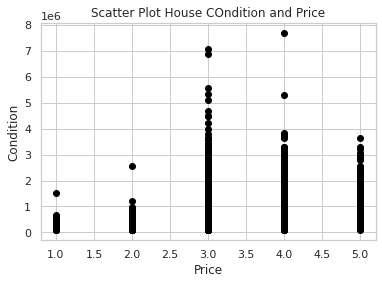

In [106]:
#Scatter plot of House Condition and Price
colors = (0,0,0)

plt.scatter(house['condition'],house['price'], c=colors,)
plt.title('Scatter Plot House COndition and Price')
plt.xlabel('Price')
plt.ylabel('Condition')
plt.show()

#THE CONDITION OF THE HOUSE AFCETS THE PRICE AS SEEN BELOW

[(0.0, 11.0)]

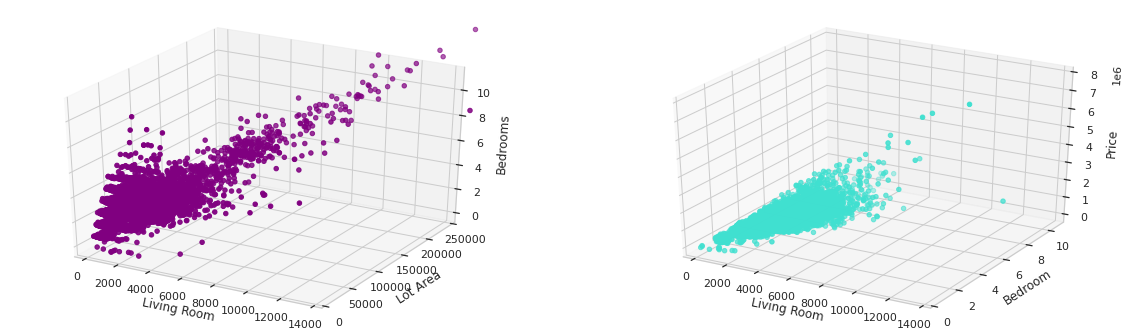

In [107]:
#3d scatter plot of Price, Bedrooms, Living Area and Lot Area

#Creating a figure to hold plots
fig=plt.figure(figsize=(20,13))

#Scatter plot showing, living room area, lot area and number of bedrooms
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(house['sqft_living'],house['sqft_lot'],house['bedrooms'],c='purple')
ax.set(xlabel="Living Room",ylabel='Lot Area',zlabel='Bedrooms')
ax.set(ylim=[0,250000])

#Scatter plot showing, living room area, number of bedrooms and Price
ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(house['sqft_living'],house['bedrooms'],house['price'],c='turquoise')
ax.set(xlabel="Living Room",ylabel='Bedroom',zlabel='Price')
ax.set(ylim=[0,11])

#WE IDENTIFY THAT  AS LIVING & LOT AREA REDUCES THE PRICE REDUCES TOO

#WE ALSO IDENTIFY THAT PRICE IS LOWER FOR LOWER LIVING ROOM AREAS AND LOWER NUMBER OF BEDROOMS

#THERE SEEMS TO BE SOME KIND OF LINEAR RELATIONSHIP BUT ITS NOT DIRECT

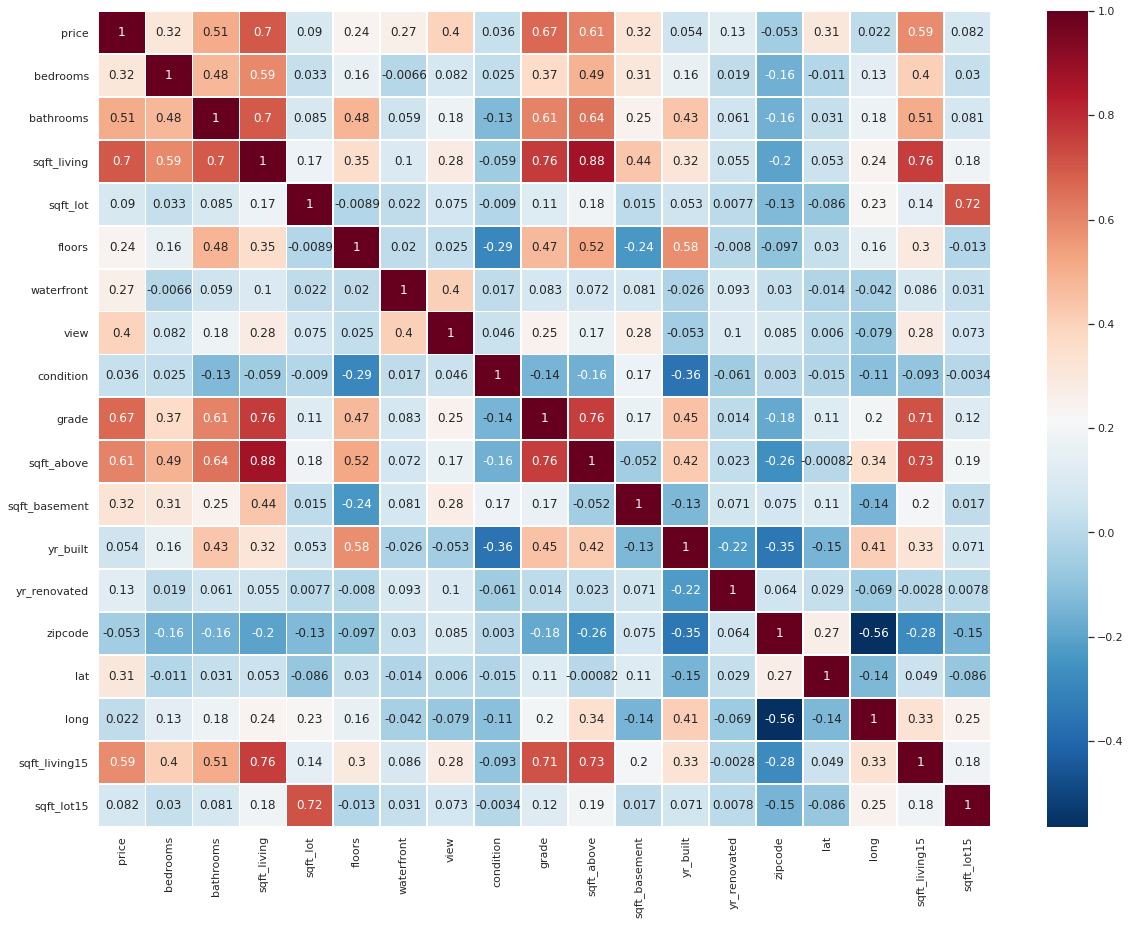

In [108]:
#Displaying Correlations with Dependent Variable
house1 = house.drop(columns = ['id'])
house_corr = house1.corr(method='pearson')

plt.figure(figsize = (20,15)) 

#Displaying heatmap 
sns.heatmap(house_corr, 
            xticklabels=house_corr.columns,
            yticklabels=house_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)


Independent Variables correlated to Price are:



1.   Strong
*   sqft_living - 0.7
*   grade - 0.67
*   sqft_above - 0.61
*   bathrooms - 0.51
*   sqft_living15 - 0.59

2.   Moderate
*   bedrooms - 0.32
*   view - 0.4
*   sqft_basement - 0.32
*   lat - 0.311



#### Checking Multicollinearity

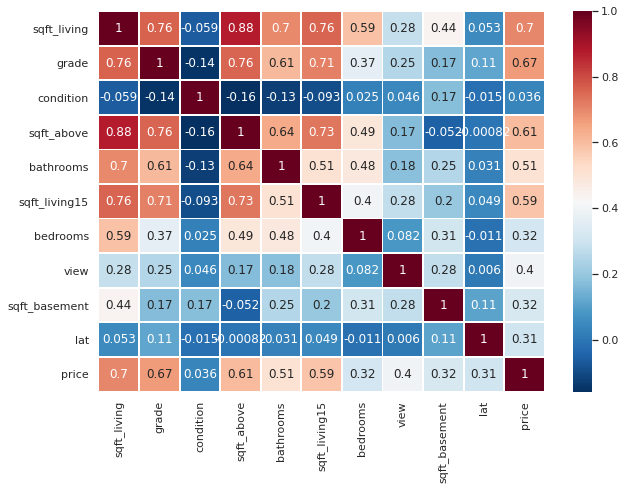

In [109]:
##Displaying Correlations between Independent Variables 

house_features = house[['sqft_living','grade','condition','sqft_above','bathrooms','sqft_living15','bedrooms','view','sqft_basement','lat','price']]
house2_corr = house_features.corr(method='pearson')

#Displaying heatmap 
plt.figure(figsize = (10,7)) 
sns.heatmap(house2_corr, 
            xticklabels=house2_corr.columns,
            yticklabels=house2_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)

We can see most features are correlated with each other hence presence of multicollinearity.

In [110]:
#Perfoming Factor Analysis to Identify which features to use from the correlated independent variables

#!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(house_features)
chi_square_value, p_value


(755622.58120383, 0.0)

Not an identity matrix since p values is zero meaning our data is now suitable for a reduction technique.

In [111]:
# Creating factor analysis object and analyse to get four factors
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(house_features,4, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
#4-factors eigenvalues > 1

,Original_Eigenvalues
0,4.943070e+00
1,1.414018e+00
2,1.110687e+00
3,9.462976e-01
4,8.255256e-01
5,5.292646e-01
6,4.650912e-01
7,3.088882e-01
8,2.447531e-01
9,2.124056e-01


In [112]:
#Previewing the loadings
house_features_NoPrice = house_features.drop(columns = ['price'])
fa = FactorAnalyzer()
fa.analyze(house_features_NoPrice, 4, rotation="varimax")
fa.loadings

#Feature columns of interest are:
# factor1: sqft_living 
# factor2: sqft_above
# factor3: grade
# factor4: sqft_basement


,Factor1,Factor2,Factor3,Factor4
sqft_living,0.877892,0.093496,0.428300,0.100526
grade,0.627195,-0.252328,0.491727,0.339826
condition,-0.089831,0.297553,0.019884,-0.120401
sqft_above,0.830797,-0.341221,0.391023,-0.109890
bathrooms,0.715096,-0.053590,0.139351,0.200898
sqft_living15,0.600309,-0.098417,0.548526,0.093093
bedrooms,0.680317,0.181379,-0.011089,-0.046916
view,0.112369,0.171257,0.391098,0.095584
sqft_basement,0.267571,0.847035,0.156003,0.426922
lat,0.005730,0.000294,0.039243,0.223830


## 7. Implementing the Solution

In [113]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import scipy as sc
from sklearn.preprocessing import StandardScaler

#### Multiple Linear Regression


In [114]:
# creating X and y variables

#Feature columns of interest from Factor Analysis are:
# factor1: sqft_living 
# factor2: sqft_above
# factor3: grade
# factor4: sqft_basement

#Will drop sqft_above since its highly correlated with sqft_living

#But we must incorporate categorical variables too
#So we'll include them in independent variables

X = house[['sqft_living','grade','sqft_basement','bedrooms','bathrooms','floors','waterfront','view','condition','grade']]
y = house['price']

#Splitting the data and using 70% of the data for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)



In [115]:
# Fitting our Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# print the coefficients
print(regressor.intercept_)
print(regressor.coef_)

-694678.1371923614
[ 1.68622460e+02  5.38542810e+04  1.61938455e+01 -4.00844137e+04
  2.83991717e+04 -3.96980051e+04  5.83406100e+05  6.36133409e+04
  5.27648482e+04  5.38542810e+04]


In [116]:
# Pairing the five features with their coefficients
list(zip(X, regressor.coef_))

[('sqft_living', 168.62246049161172),
 ('grade', 53854.28102046813),
 ('sqft_basement', 16.19384553405689),
 ('bedrooms', -40084.41369816218),
 ('bathrooms', 28399.17166859601),
 ('floors', -39698.005100133225),
 ('waterfront', 583406.0995584421),
 ('view', 63613.3409352379),
 ('condition', 52764.84821322835),
 ('grade', 53854.28102046733)]

In [117]:
#Making predictions and plotting residuals
y_pred = regressor.predict(X_test)
residuals = y_pred - y_test


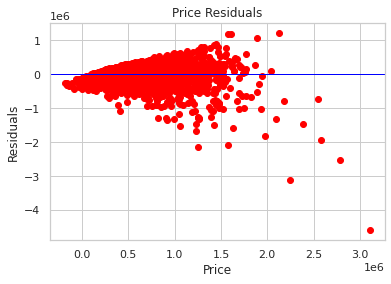

In [118]:
# Plotting residuals

plt.scatter(y_pred, residuals, color='red')
plt.title('Price Residuals')
plt.ylabel('Residuals')
plt.xlabel('Price')
plt.axhline(y= residuals.mean(), color='blue', linewidth=1)
plt.show()

In [119]:
# Assessing Heteroskedasticity using barlett's test

test_result, p_value = sc.stats.bartlett(y_pred, residuals)

print("P-Value is ;",p_value )
print('Baseline MSE:', metrics.mean_squared_error(y_test, y_pred))
print("Mean Price is: ", house['price'].mean())
print('Baseline RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

P-Value is ; 4.360188457169791e-67
Baseline MSE: 53080767222.22773
Mean Price is:  540178.9448403517
Baseline RMSE: 230392.63708336628
#################


{'bathrooms': 28399.17166859601,
 'bedrooms': -40084.41369816218,
 'condition': 52764.84821322835,
 'floors': -39698.005100133225,
 'grade': 53854.28102046733,
 'sqft_basement': 16.19384553405689,
 'sqft_living': 168.62246049161172,
 'view': 63613.3409352379,
 'waterfront': 583406.0995584421}


*   The residuals are not centred around the mean/normally distributed indicating the model is not performing well and heteroskedasticity is present.
*   The P Value is also less than significance level of 0.5 confirming presence of Heteroskedasticity.
*   The RMSE is > 10% of Mean Price, hence model is performing poorly.



#### Recommendation

The Multiple Linear  Regression Model is not performing well. Also, the linear relationship between the price and the predictor variables is not clearly identifiable hence we should use Quantile Regression which is an extension of Linear Regression in cases where theres presence of outliers,skewness in dependent variable,multicollinearity and heteroskedasticity.

#### Quantile Regression


In [41]:
#Importing the Library

import statsmodels.regression.quantile_regression as Q_reg

In [126]:
#Creating X and y variables

X = house.iloc[:,2:20]
y = house.price

#Splitting our data and using 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

#Creating a function for Quantile Regression and an array with the 3 different quantiles

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 

   mod = Q_reg
   mod.QuantReg(y_train, X_train).fit(q=q)
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

   Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

    # Get the R-squared for 50% percentile
q = 0.5
y_test_pred1 = Q_reg.QuantReg(y_train, X_train).fit(q=0.25).predict(X_test)
y_test_pred2 = Q_reg.QuantReg(y_train, X_train).fit(q=0.5).predict(X_test)
y_test_pred3 = Q_reg.QuantReg(y_train, X_train).fit(q=0.75).predict(X_test)
r2 = metrics.r2_score(y_test,y_test_pred)


print("R Squared score:", r2)
print("Quantile  MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("Mean Price is: ", house['price'].mean())
print("Quantile RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(mod.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


ValueError: ignored

###### Lasso Regression

In [76]:

#Creating X and y variables
from sklearn import linear_model

X = house.iloc[:,2:20]
y = house['price']

# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the lasso model

lasso.fit(X, y) 

#Splitting into 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

#specifying parameters
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395403774397157.5, tolerance: 291664533601.623
  positive)


In [79]:
# Fitting Lasso model and print the best parameters, R-squared scores, MSE and RMSE
import warnings
warnings.filterwarnings("ignore")
gridlasso.fit(X_train, y_train) 


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [81]:
#Predicting and printing the metrics

print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("Mean Price is: ", house['price'].mean())
print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

lasso score: 0.6935858677580481
lasso MSE: 40845289002.640915
Mean Price is:  540178.9448403517
lasso RMSE: 202102.1746608406
#################


{'bathrooms': 51587.97023743592,
 'bedrooms': -38876.191839059735,
 'condition': 27359.472878958437,
 'floors': 1975.0106443509555,
 'grade': 95860.81578944135,
 'lat': 602524.6727913385,
 'long': -211796.80347880287,
 'sqft_above': -102.52636718504179,
 'sqft_basement': -133.23864384832973,
 'sqft_living': 282.76498224693677,
 'sqft_living15': 23.09923850806817,
 'sqft_lot': 0.11891164865106127,
 'sqft_lot15': -0.3879323909796257,
 'view': 52609.78794791151,
 'waterfront': 583196.8737866748,
 'yr_built': -2580.50063727864,
 'yr_renovated': 19.652619190406238,
 'zipcode': -588.3823633263511}

#### Recommendations

The Lasso Regression Model RMSE scores have reduced further meaning the models performance has improved.. However, despite Lasso reducing some feature coefficients to zero, we can use Ridge Regression to reduce the coefficients to values that are not zero and improve accuracy of our model.

#### Ridge Regression


In [60]:
#Importing Libraries for Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [635]:
X = house.iloc[:,2:20]
y = house['price']

#Splitting the data and using 70% of the data for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [636]:
#Ridge Regression Model
#L2 or alpha is the name of the hyperparameter used in ridge regression. 
#It requires the use of a grid
#In ridge model we indicat normalization in order to get better estimates
#Refit set to true means to adjust the parameters while modeling 
#cv is the number of folds to develop for the cross-validation
#logspace means log of -5 to 2, but we only get 8 values from within that range evenly spread out

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [637]:
#Fitting the Ridge model and identifying the best parameters and scores for the model
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
print(abs(search.best_score_) )
print(search.best_params_)


40672923732.88095
{'alpha': 0.01}


In [71]:
# We can confirm this by fitting our model with the ridge information and finding the RMSE below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)


y_pred = ridge.predict(X)
print("Ridge score:", ridge.score(X, y))
print("Mean Price is: ", house['price'].mean())
print('Ridge MSE:', metrics.mean_squared_error(y, y_pred))
print('Ridge RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

Ridge score: 0.7022342785408677
Mean Price is:  540178.9448403517
Ridge MSE: 40188662782.01231
Ridge RMSE: 200471.10211203087
#################


{'bathrooms': 51352.673578899536,
 'bedrooms': -37538.1538914431,
 'condition': 27702.47648777808,
 'floors': 2274.7730484443064,
 'grade': 94129.41138680164,
 'lat': 598116.2194644554,
 'long': -210205.73336296147,
 'sqft_above': 90.47705663905971,
 'sqft_basement': 60.79187762839964,
 'sqft_living': 87.66629884302539,
 'sqft_living15': 25.802264779759582,
 'sqft_lot': 0.11780329200160441,
 'sqft_lot15': -0.3770320856985868,
 'view': 52649.281788139764,
 'waterfront': 579116.9073874837,
 'yr_built': -2516.636066051307,
 'yr_renovated': 20.735265697304122,
 'zipcode': -566.6466022006653}

#### Recommendation

The RMSE value has reduced from Lasso Regression and the score has gone up slightly indicating and improvement in the model's performance. To improve the performance further, we'll use a balance of Ridge and Lasso Regression using Elastic  Net Regression.

#### Elastic Net Regressioner

In [55]:
#Importing Library
from sklearn.linear_model import ElasticNet

In [56]:
#Creating X and y variables

X = house.iloc[:,2:20]
y = house['price']

In [61]:
# Normalising Elastic Net Regression and creating our GridSearch

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [62]:
# Fitting our model and displaying the best parameters and best results
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
40719262478.86805


In [72]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 

elastic = ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)

#Printing the metrics after prediction

y_pred = elastic.predict(X)

print("Elastic score:", elastic.score(X, y))
print("Mean Price is: ", house['price'].mean())
print('Elastic MSE:', metrics.mean_squared_error(y, y_pred))
print('Elastic RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

#Printing the coefficients
print("#################")
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline




Elastic score: 0.701538658486492
Mean Price is:  540178.9448403517
Elastic MSE: 40282548806.41
Elastic RMSE: 200705.12899876278
#################


{'bathrooms': 50600.44856607776,
 'bedrooms': -33477.759011697366,
 'condition': 28517.19411453782,
 'floors': 3214.138506220057,
 'grade': 89158.23618120587,
 'lat': 583423.1918467908,
 'long': -204073.15449757164,
 'sqft_above': 87.06850437214928,
 'sqft_basement': 60.539310332358944,
 'sqft_living': 84.83679075052558,
 'sqft_living15': 33.15430584096286,
 'sqft_lot': 0.11348648040006913,
 'sqft_lot15': -0.3433976537757791,
 'view': 52761.748944041596,
 'waterfront': 565578.1659374286,
 'yr_built': -2330.203378590985,
 'yr_renovated': 23.737526970978,
 'zipcode': -501.81842059211203}

#### Recommendation

The RMSE has increased slightly indicating a decrease in  the accuracy of the model . In this case, Ridge Regression model seems to be the right model for this data since it has the lowest RMSE value. 

## 8. Challenging the solution

## 9. Follow up questions

### a). Did we have the right data?

Yes, the data was right.

### b). Do we need other data to answer our question?

No.

### c). Did we have the right question?


The question was indeed right.